In [1]:
import os
import tkinter as tk
from tkinter import filedialog, scrolledtext, messagebox
import docx2txt
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load spaCy model for English
nlp = spacy.load("en_core_web_sm")

def read_docx(file_path):
    """
    Reads a .docx file and returns its text.
    """
    text = docx2txt.process(file_path)
    return text

def preprocess_text(text):
    """
    Preprocesses the given text: conversion to lowercase, removal of stopwords and punctuation, and lemmatization.
    """
    doc = nlp(text.lower())
    return " ".join([token.lemma_ for token in doc if not token.is_stop and not token.is_punct])

def calculate_similarity(tfidf_matrix):
    """
    Calculate cosine similarity between the first document (job description) and all other documents (resumes).
    """
    return cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:]).flatten()

def select_folder():
    folder_selected = filedialog.askdirectory()
    folder_path.set(folder_selected)

def process_and_rank_resumes():
    job_description_text = job_desc_text.get("1.0", tk.END).strip()
    resumes_folder = folder_path.get()

    if not job_description_text or not resumes_folder:
        messagebox.showerror("Error", "Please provide a job description and select a folder.")
        return

    job_description_processed = preprocess_text(job_description_text)

    resume_texts = [job_description_processed]  # First document is the job description
    filenames = []

    # Read and preprocess each resume
    for filename in os.listdir(resumes_folder):
        if filename.endswith(".docx"):
            file_path = os.path.join(resumes_folder, filename)
            resume_text = read_docx(file_path)
            resume_processed = preprocess_text(resume_text)
            resume_texts.append(resume_processed)
            filenames.append(filename)

    # Feature extraction and similarity calculation
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(resume_texts)
    similarities = calculate_similarity(tfidf_matrix)

    # Ranking the resumes based on similarity
    ranked_resumes = sorted(zip(filenames, similarities), key=lambda x: x[1], reverse=True)

    # Displaying the ranked list in the GUI
    result_text.delete(1.0, tk.END)
    for i, (filename, score) in enumerate(ranked_resumes, start=1):
        result_text.insert(tk.END, f"{i}. {filename} (Score: {score:.4f})\n")

# GUI Setup
root = tk.Tk()
root.title("Resume Ranker")

folder_path = tk.StringVar()

job_desc_label = tk.Label(root, text="Job Description:")
job_desc_label.pack()
job_desc_text = scrolledtext.ScrolledText(root, height=10)
job_desc_text.pack()

folder_label = tk.Label(root, text="Select Resumes Folder:")
folder_label.pack()
folder_entry = tk.Entry(root, textvariable=folder_path, state='readonly', width=50)
folder_entry.pack()
folder_button = tk.Button(root, text="Browse", command=select_folder)
folder_button.pack()

process_button = tk.Button(root, text="Process and Rank Resumes", command=process_and_rank_resumes)
process_button.pack()

result_label = tk.Label(root, text="Ranked Resumes:")
result_label.pack()
result_text = scrolledtext.ScrolledText(root, height=10)
result_text.pack()

root.mainloop()


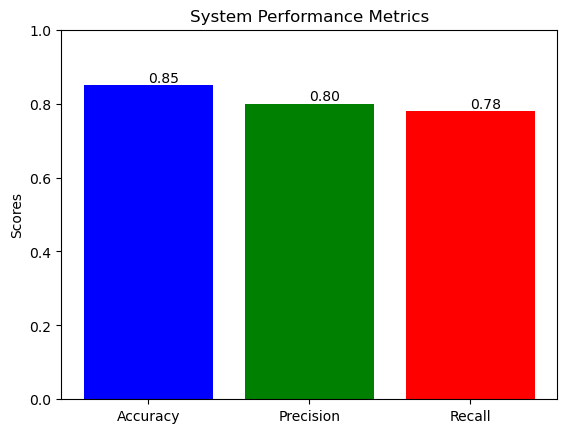

In [ ]:
import os
import tkinter as tk
from tkinter import filedialog, scrolledtext, messagebox
import docx2txt
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import numpy as np

# Load spaCy model for English
nlp = spacy.load("en_core_web_sm")

def read_docx(file_path):
    """
    Reads a .docx file and returns its text.
    """
    text = docx2txt.process(file_path)
    return text

def preprocess_text(text):
    """
    Preprocesses the given text: conversion to lowercase, removal of stopwords and punctuation, and lemmatization.
    """
    doc = nlp(text.lower())
    return " ".join([token.lemma_ for token in doc if not token.is_stop and not token.is_punct])

def calculate_similarity(tfidf_matrix):
    """
    Calculate cosine similarity between the first document (job description) and all other documents (resumes).
    """
    return cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:]).flatten()

def select_folder():
    folder_selected = filedialog.askdirectory()
    folder_path.set(folder_selected)

def process_and_rank_resumes():
    job_description_text = job_desc_text.get("1.0", tk.END).strip()
    resumes_folder = folder_path.get()

    if not job_description_text or not resumes_folder:
        messagebox.showerror("Error", "Please provide a job description and select a folder.")
        return

    job_description_processed = preprocess_text(job_description_text)

    resume_texts = [job_description_processed]  # First document is the job description
    filenames = []

    # Read and preprocess each resume
    for filename in os.listdir(resumes_folder):
        if filename.endswith(".docx"):
            file_path = os.path.join(resumes_folder, filename)
            resume_text = read_docx(file_path)
            resume_processed = preprocess_text(resume_text)
            resume_texts.append(resume_processed)
            filenames.append(filenames

    # Feature extraction and similarity calculation
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(resume_texts)
    similarities = calculate_similarity(tfidf_matrix)

    # Ranking the resumes based on similarity
    ranked_resumes = sorted(zip(filenames, similarities), key=lambda x: x[1], reverse=True)

    # Displaying the ranked list in the GUI
    result_text.delete(1.0, tk.END)
    for i, (filename, score) in enumerate(ranked_resumes, start=1):
        result_text.insert(tk.END, f"{i}. {filename} (Score: {score:.4f})\n")

    # Assuming you have these metrics calculated elsewhere
    plot_performance_metrics()

def plot_performance_metrics():
    metrics = ['Accuracy', 'Precision', 'Recall']
    values = [0.85, 0.80, 0.78]  # Hypothetical values

    fig, ax = plt.subplots()
    bars = ax.bar(metrics, values, color=['blue', 'green', 'red'])
    ax.set_ylabel('Scores')
    ax.set_title('System Performance Metrics')
    ax.set_xticks(np.arange(len(metrics)))
    ax.set_xticklabels(metrics)
    ax.set_ylim([0, 1])

    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', va='bottom')

    plt.show()

# GUI Setup
root = tk.Tk()
root.title("Resume Ranker")

folder_path = tk.StringVar()

job_desc_label = tk.Label(root, text="Job Description:")
job_desc_label.pack()
job_desc_text = scrolledtext.ScrolledText(root, height=10)
job_desc_text.pack()

folder_label = tk.Label(root, text="Select Resumes Folder:")
folder_label.pack()
folder_entry = tk.Entry(root, textvariable=folder_path, state='readonly', width=50)
folder_entry.pack()
folder_button = tk.Button(root, text="Browse", command=select_folder)
folder_button.pack()

process_button = tk.Button(root, text="Process and Rank Resumes", command=process_and_rank_resumes)
process_button.pack()

result_label = tk.Label(root, text="Ranked Resumes:")
result_label.pack()
result_text = scrolledtext.ScrolledText(root, height=10)
result_text.pack()

root.mainloop()
